Text(0, 0.5, 'Number of cases')

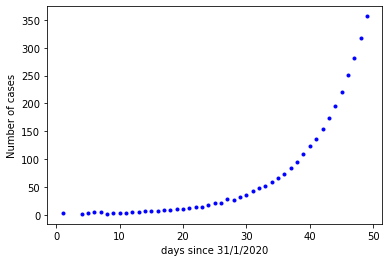

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

DataArray = pd.read_csv('assignment1.csv').to_numpy()[:,[1,2]]

plt.figure()
plt.plot(DataArray[:,0],DataArray[:,1],'b.')#,x,h(x),'k--')
plt.xlabel('days since 31/1/2020')
plt.ylabel('Number of cases')

In [16]:
# Split the data into training, validation, test sets
def split_data(DA, seed=2443250962):
    np.random.seed(seed)
    # Randomise the data order
    D = np.random.permutation(DA)
    # Split the data into folds
    Folds = np.array_split(D,3)
    # Assign the Folds to train, validate, test sets and sort (not necessary)
    Folds[0].argsort()
    Folds[1].argsort()
    Folds[2].argsort()
    TrainData = {'x': Folds[0][:,0].reshape((-1,1)), 't': Folds[0][:,1].reshape((-1,1))}
    ValidateData = {'x': Folds[1][:,0].reshape((-1,1)), 't': Folds[1][:,1].reshape((-1,1))}
    TestData = {'x': Folds[2][:,0].reshape((-1,1)), 't': Folds[2][:,1].reshape((-1,1))}
    return TrainData, ValidateData, TestData

0 &  5.61
1 & -0.13 &  0.12
2 &  1.22 &  0.06 &  0.00
3 & -10.45 &  0.88 & -0.02 &  0.00
4 & 54.80 & -5.52 &  0.22 & -0.00 &  0.00
5 & -97.14 & 14.30 & -0.81 &  0.02 & -0.00 &  0.00
6 & -22.86 &  4.29 & -0.27 &  0.01 & -0.00 &  0.00 &  0.00
7 & -53.66 &  4.58 & -0.06 & -0.00 &  0.00 &  0.00 & -0.00 &  0.00
8 & -23.48 &  1.47 &  0.02 & -0.00 & -0.00 &  0.00 &  0.00 & -0.00 &  0.00
9 & -19.85 &  1.32 &  0.01 & -0.00 & -0.00 &  0.00 & -0.00 & -0.00 & -0.00 &  0.00
10 & -22.58 &  1.78 & -0.02 & -0.00 & -0.00 &  0.00 &  0.00 & -0.00 & -0.00 &  0.00 &  0.00


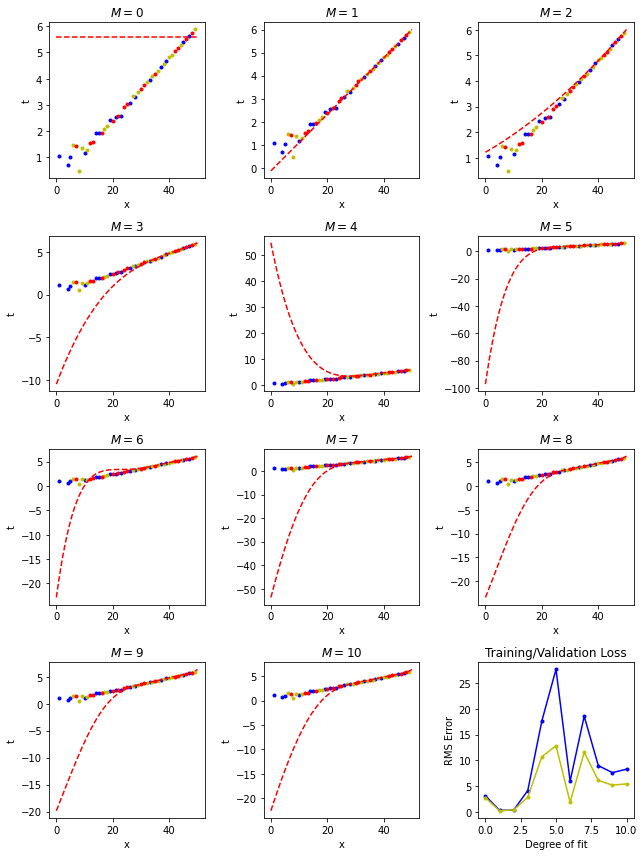

In [30]:
# The training set
import matplotlib.pyplot as plt
# w0=lna=0.38, w1=b=0.11
TrainData, ValidateData, TestData = split_data(DataArray, seed=2443250962)
xtrain = TrainData['x'].reshape(16)
ttrain = np.log(TrainData['t']).reshape(16)
# The validation set
xvalid = ValidateData['x'].reshape(16)
tvalid = np.log(ValidateData['t']).reshape(16)
# The test set
xtest = TestData['x'].reshape(15)
ttest = np.log(TestData['t']).reshape(15)
xmin = 0
xmax = 50
### W matrix
WWW = np.diag(np.exp(xtrain))
# Define a single independent variable
N = 101
x = np.linspace(xmin, xmax, num=N)
# Maximum degree of fit
M = 11
# Empty list to record the RMS errors
rmstrain = []
rmsvalid = []
# Empty list to record the weights for each regression run
weights = []
plt.figure(figsize=[9,12])
# For each degree of polynomial fit
for i in range(0,M):
    # Create the Matrix of basis functions for the sampled data
    PhiTrain = np.array([pow(xtrain,j) for j in range(0,i+1)]).transpose()
    PhiValid = np.array([pow(xvalid,j) for j in range(0,i+1)]).transpose()
    PhiTest = np.array([pow(xtest,j) for j in range(0,i+1)]).transpose()
    # Create a high-resolution basis matrix so that we can plot the fitted polynomial smoothly
    hiPhi = np.array([pow(x,j) for j in range(0,i+1)]).transpose()
    # Solve the normal equations using a standard solver
    w = np.linalg.solve(np.matmul(np.matmul(PhiTrain.transpose(),WWW),PhiTrain), np.matmul(np.matmul(PhiTrain.transpose(), WWW),ttrain))
    # record the weights
    weights.append(w)
    # Compute the estimated values of the data points so we can compute the error
    ytrain = np.matmul(PhiTrain,w)
    yvalid = np.matmul(PhiValid,w)
    # compute the RMS error
    rmstrain.append(np.sqrt(np.sum(pow(ttrain-ytrain,2)/xtrain.size)))
    rmsvalid.append(np.sqrt(np.sum(pow(tvalid-yvalid,2)/xvalid.size)))
    # plot the data and the estimates of the model for the low-res and high-res samplings
    plt.subplot(4,3,i+1)
    #plt.plot(x,h(x),'k-')
    plt.plot(xtrain,ttrain,'b.')
    plt.plot(xvalid,tvalid,'y.')
    plt.plot(xtest,ttest,'r.')
    plt.plot(x,np.matmul(hiPhi,w),'r--')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(fr'$M={i}$')
# Plot the error curve
plt.subplot(4,3,M+1)
plt.plot(rmstrain,'b.-')
plt.plot(rmsvalid,'y.-')
plt.xlabel('Degree of fit')
plt.ylabel('RMS Error')
plt.title('Training/Validation Loss')
plt.tight_layout()
plt.savefig('polyfit-sin-11-validation.png')
# Print out the weights
for i,w in enumerate(weights):
    print(str(i) + ' & ' + ' & '.join(['{:5.2f}'.format(i) for i in w]))   

In [42]:
print(np.exp(-0.13))
b = 0.12

0.8780954309205613


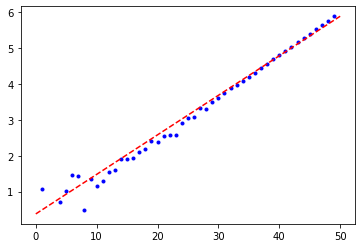

In [38]:
plt.figure()
plt.plot(DataArray[:,0],np.log(DataArray[:,1]),'b.')
plt.plot(x, 0.38 + 0.11*x, 'r--')

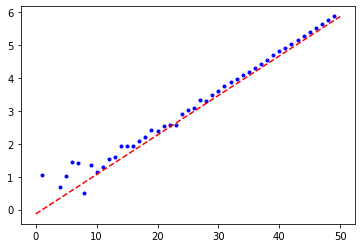

In [41]:
plt.figure()
plt.plot(DataArray[:,0],np.log(DataArray[:,1]),'b.')
plt.plot(x, -0.13 + 0.12*x, 'r--')